In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


In [8]:
df= pd.read_csv(r"C:\Users\jainv\Downloads\archive (1)\Spotify Most Streamed Songs.csv")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [9]:
df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,E,Minor,61,32,67,15,0,11,5,https://i.scdn.co/image/ab67616d0000b273992a1f...


In [10]:
df.shape

(953, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [12]:
duplicates= df.duplicated().sum()
print(duplicates)

0


In [13]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [14]:
missing_values= df.isnull().sum()
print(missing_values)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64


In [15]:
print(df['in_shazam_charts'])

0      826
1      382
2      949
3      548
4      425
      ... 
948      0
949      0
950      0
951      0
952      0
Name: in_shazam_charts, Length: 953, dtype: object


In [16]:
# keys=df['key'].unique()

In [17]:
key_counts = df['key'].value_counts()
# print(occurence_keys)
# print(occurence_keys.dtypes)

<BarContainer object of 11 artists>

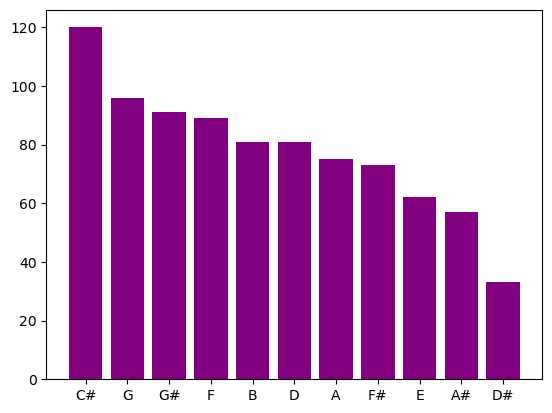

In [18]:
keys = key_counts.index  # the keys (categories)
occurrence_keys = key_counts.values  # their respective counts

# Plotting
plt.bar(keys, occurrence_keys, color='purple')


In [19]:
df_cleaned= df.dropna()
new_key_counts = df_cleaned['key'].value_counts()

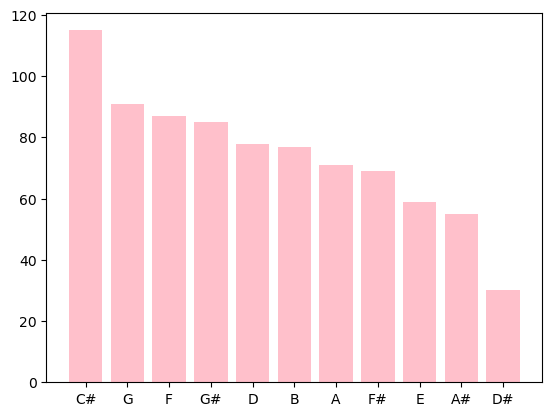

In [20]:
new_keys = new_key_counts.index  # the keys (categories)
new_occurrence_keys = new_key_counts.values  # their respective counts

# Plotting
plt.bar(new_keys, new_occurrence_keys, color='pink')
plt.show()

In [21]:
Num_of_artists= df['artist_count'].value_counts()

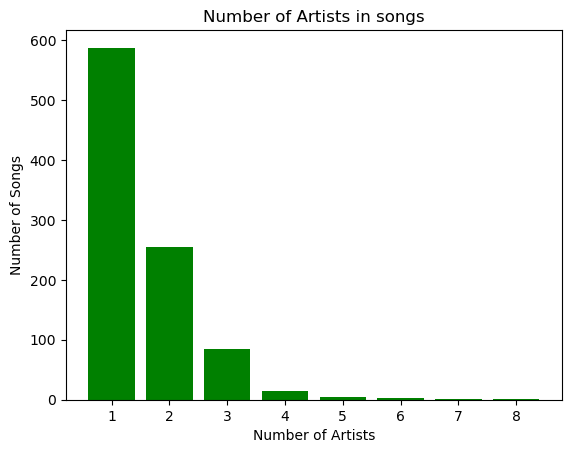

In [22]:
num_artists = Num_of_artists.index  
occurrence_artists = Num_of_artists.values  

# Plotting
plt.bar(num_artists,occurrence_artists , color='green')
plt.title('Number of Artists in songs')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Songs')
plt.show()

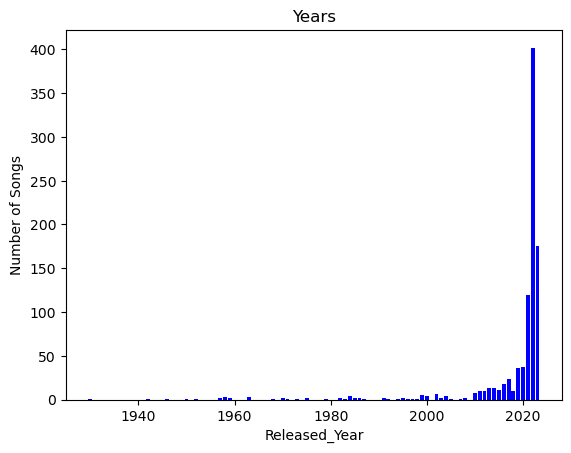

In [23]:
#Most of the songs are singles only

Year= df['released_year'].value_counts()
Years = Year.index  
Num_of_Songs = Year.values  

# Plotting
plt.bar(Years,Num_of_Songs , color='blue')
plt.title('Years')
plt.xlabel('Released_Year')
plt.ylabel('Number of Songs')
plt.show()


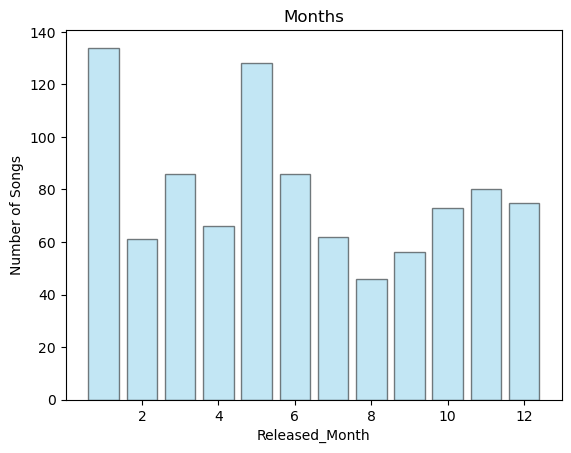

In [24]:
#This is left skewed and Most no. of songs are released in the year 2022
Month= df['released_month'].value_counts()
Months = Month.index  
Num_of_Songs = Month.values  

# Plotting
plt.bar(Months ,Num_of_Songs , color='skyblue', alpha=0.5, edgecolor='black')
plt.title('Months')
plt.xlabel('Released_Month')
plt.ylabel('Number of Songs')
plt.show()

In [25]:
#There is not much difference but mostly songs are released in 1st and 5th month
df_new= df.drop('released_day', axis=1)
df_new.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,553,147,141381703,43,263,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,1474,48,133716286,48,126,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,1397,113,140003974,94,207,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,7858,100,800840817,116,207,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,3133,50,303236322,84,133,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [57]:
party_songs=[]
others=[]

for x in df['danceability_%']:
    if x>80:
        party_songs.append(x)
    else:
        others.append(x)

party_songs
print(len(party_songs))



178


In [61]:
#out of total 178 are party songs

instrumental_songs=[]
others1=[]

for x in df['instrumentalness_%']:
    if x>80:
        instrumental_songs.append(x)
    else:
        others1.append(x)

instrumental_songs
print(len(instrumental_songs))


3


In [63]:
#only three songs are more on instrumental side

live_songs=[]
others2=[]

for x in df['liveness_%']:
    if x>70:
        live_songs.append(x)
    else:
        others2.append(x)

live_songs
print(len(live_songs))





10


In [65]:
#only ten songs are more on instrumental side

podcasts=[]
others3=[]

for x in df['speechiness_%']:
    if x>90:
        podcasts.append(x)
    else:
        others3.append(x)

podcasts
print(len(podcasts))

0


In [67]:
Energetic=[]
others4=[]

for x in df['energy_%']:
    if x>85:
        Energetic.append(x)
    else:
        others4.append(x)


print(len(Energetic))

89


In [69]:
Valence=[]
others5=[]

for x in df['valence_%']:
    if x>80:
        Valence.append(x)
    else:
        others5.append(x)


print(len(Valence))

124


In [71]:
Acoustic=[]
others6=[]

for x in df['acousticness_%']:
    if x>80:
        Acoustic.append(x)
    else:
        others6.append(x)


print(len(Acoustic))

52


In [ ]:
#More no. of songs have danceability% and valence% high compartive to others.

In [86]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')

In [90]:
Modes= df['mode'].unique()
print(Modes)

['Major' 'Minor']


In [96]:
counts=  df['mode'].value_counts()
print(counts)

mode
Major    550
Minor    403
Name: count, dtype: int64


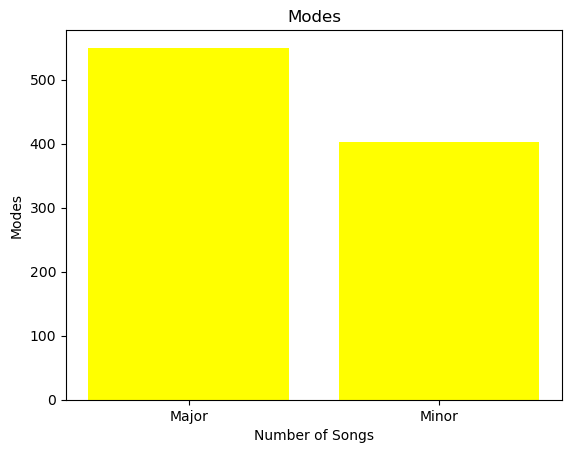

In [102]:
plt.bar( counts.index,counts.values , color='yellow')
plt.title('Modes')
plt.xlabel('Number of Songs')
plt.ylabel('Modes')
plt.show()

In [122]:
#Songs more have their mode as major
#Finding Outliers




dat=df['in_spotify_playlists']

# Finding IQR 
Q1 = dat.quantile(0.25)
Q3 = dat.quantile(0.75)

IQR = Q3 - Q1

# Finding the lower and upper bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)
print('IQR:', IQR)
print('Q1:', Q1)
print('Q3:', Q3)
# Finding the number of outliers

outliers = dat[(dat < lower_bound) | (dat > upper_bound)]

# Multiple outliers found with the IQR method

outliers






Lower Bound: -6125.5
Upper Bound: 12542.5
IQR: 4667.0
Q1: 875.0
Q3: 5542.0


14     23575
22     12859
41     24094
43     13387
48     29536
       ...  
820    13101
871    41231
893    17504
902    19806
910    30992
Name: in_spotify_playlists, Length: 109, dtype: int64

In [124]:
print(len(outliers))

109


In [142]:
#109 outliers are there

Percentage_outliers= (outliers.shape[0]/dat.shape[0])*100
print(Percentage_outliers)

11.437565582371459


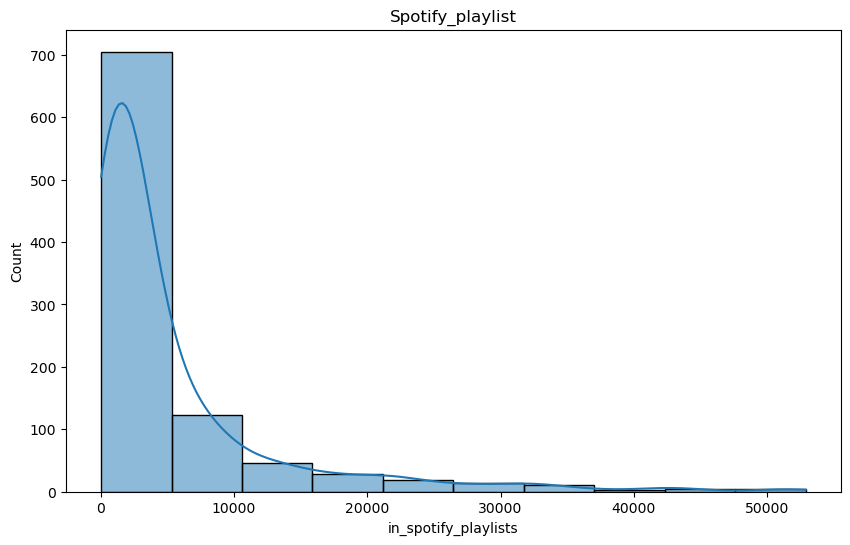

In [144]:
plt.figure(figsize=(10, 6))
sns.histplot(dat, kde=True, bins=10)
plt.title('Spotify_playlist')
plt.show()

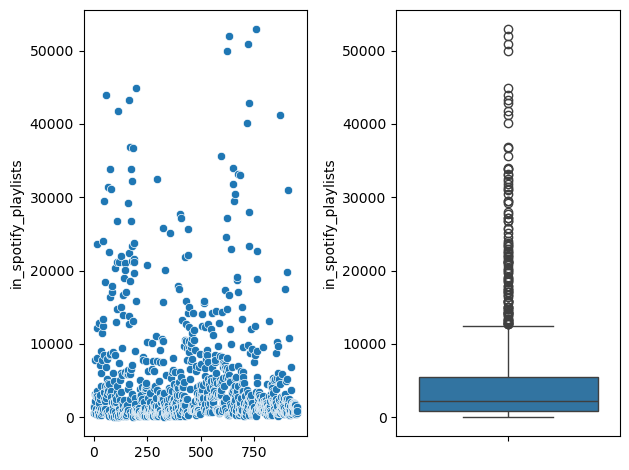

In [146]:
plt.subplot(1, 2, 1)
sns.scatterplot(dat)
plt.subplot(1, 2, 2)
sns.boxplot(dat)
plt.tight_layout()
plt.show()


(953, 25)


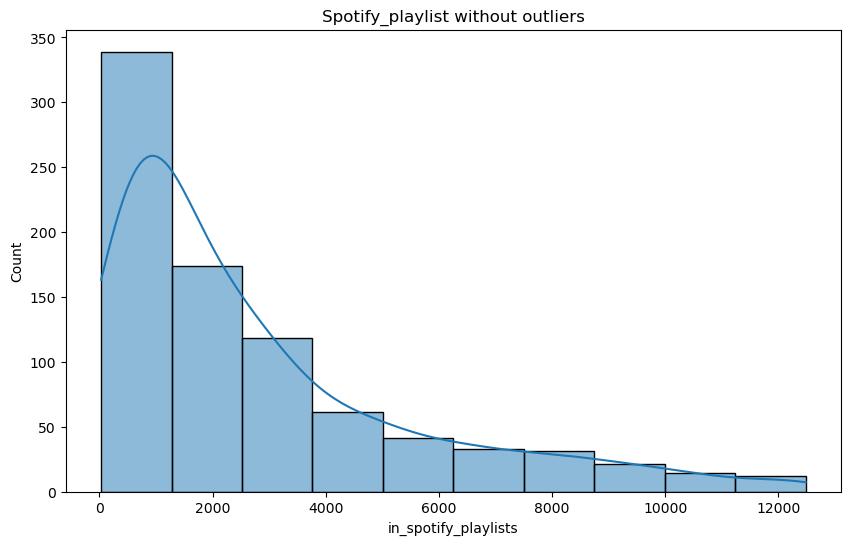

In [148]:
# Most songs are featured in a relatively small number of playlists, while a few songs are included in a much larger number, leading to a long tail of high values
#The box plot shows a significant number of high outliers, suggesting a small set of extremely popular songs.

# removing the outliers
dat = dat[(dat > lower_bound) & (dat < upper_bound)]
print(df.shape)

# Plotting the data

plt.figure(figsize=(10, 6))
sns.histplot(dat, kde=True, bins=10)
plt.title('Spotify_playlist without outliers')
plt.show()

In [154]:
#The histogram shows a right-skewed distribution, with most songs appearing in fewer than 2,000 playlists and a gradual decrease in frequency as the playlist count increases. This reflects the long-tail nature of streaming, where a small number of songs dominate in popularity while most have low representation.

z_scores = stats.zscore(dat)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
print("Number of outliers: ", outliers.sum())
print("Number of outliers: ", np.count_nonzero(outliers))

Number of outliers:  13
Number of outliers:  13


<Axes: xlabel='in_spotify_playlists', ylabel='Count'>

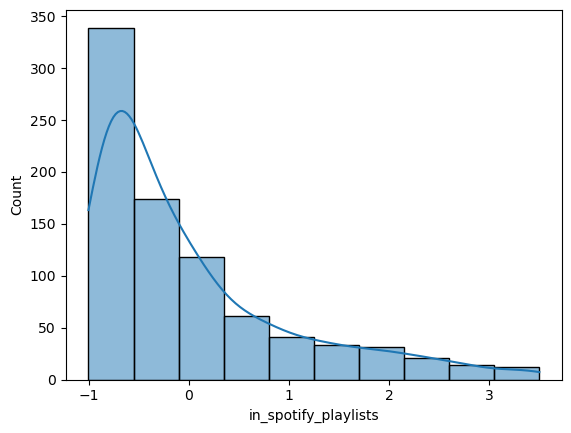

In [156]:
sns.histplot(z_scores, kde=True, bins=10)

In [158]:
#Bivariate Analysis
dat1 = df.loc[:, ['danceability_%', 'energy_%']]
dat1.describe()

,danceability_%,energy_%
count,953.00000,953.000000
mean,66.96957,64.279119
std,14.63061,16.550526
min,23.00000,9.000000
25%,57.00000,53.000000
50%,69.00000,66.000000
75%,78.00000,77.000000
max,96.00000,97.000000


In [164]:
# Testing for correlation
dat1.corr()

,danceability_%,energy_%
danceability_%,1.000000,0.198095
energy_%,0.198095,1.000000


In [166]:
# ANOVA testing
f_statistic, p_value = stats.f_oneway(df['danceability_%'], df['energy_%'])
print('F statistic:', f_statistic)
print('P value:', p_value)

# p value is less than 0.05, we reject the null hypothesis that the two columns are independent
# The two columns depend upon each other.

F statistic: 14.13662946845971
P value: 0.00017513051931116036


<Axes: xlabel='danceability_%', ylabel='energy_%'>

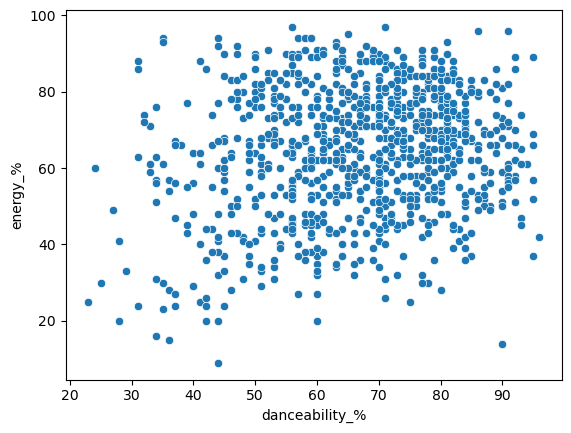

In [170]:
sns.scatterplot(x='danceability_%', y='energy_%', data=dat1)

In [172]:
#There’s a weak positive correlation between danceability and energy, but songs exhibit wide variation in both attributes without clear trends.

#Multivariate Analysis

df = df.loc[:, ['danceability_%', 'energy_%', 'track_name']]
df.head()

,danceability_%,energy_%,track_name
0,80,83,Seven (feat. Latto) (Explicit Ver.)
1,71,74,LALA
2,51,53,vampire
3,55,72,Cruel Summer
4,65,80,WHERE SHE GOES


In [174]:
df.dtypes


danceability_%     int64
energy_%           int64
track_name        object
dtype: object

In [176]:
df['track_name'] = df['track_name'].astype('category')

In [182]:
track_names = df['track_name'].unique()
print(track_names)
print('Name of Tracks:', len(track_names))

['Seven (feat. Latto) (Explicit Ver.)', 'LALA', 'vampire', 'Cruel Summer', 'WHERE SHE GOES', ..., 'My Mind & Me', 'Bigger Than The Whole Sky', 'A Veces (feat. Feid)', 'En La De Ella', 'Alone']
Length: 943
Categories (943, object): [''Till I Collapse', '(It Goes Like) Nanana - Edit', '10 Things I Hate About You', '10:35', ..., 'ýýý98 Braves', 'ýýýabcdefu', 'ýýýýýýýýýýýý', 'ýýýýýýýýýýýýýýýýýýýýý']
Name of Tracks: 943


In [184]:
# Encoding the categorial variables according to "track_names"
df['track_name'] = df['track_name'].apply(lambda x: np.where(track_names == x)[0][0])
df['track_name'].value_counts()

track_name
12     2
345    2
331    2
335    2
509    2
      ..
340    1
511    1
76     1
64     1
374    1
Name: count, Length: 943, dtype: int64

<Axes: >

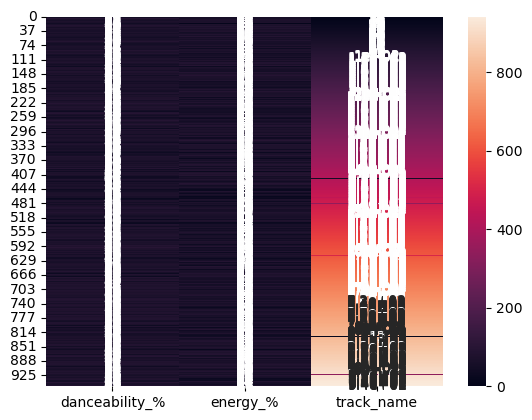

In [186]:
sns.heatmap(df, annot=True)

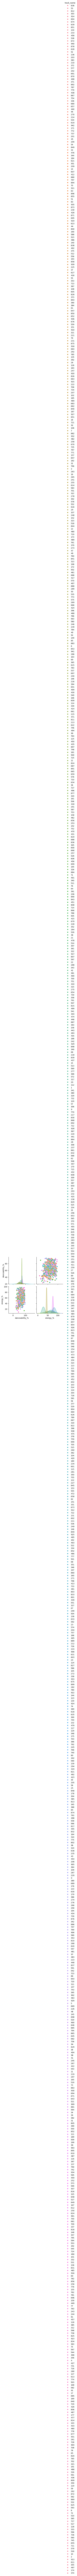

In [190]:
sns.pairplot(df, hue='track_name')